# Machine Intelligence II - Team MensaNord
## Sheet 08

- Nikolai Zaki
- Alexander Moore
- Johannes Rieke
- Georg Hoelger
- Oliver Atanaszov

In [1]:
from __future__ import division, print_function
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats
import numpy as np
import math

(500, 2)
[-0.03206334  0.02905982]


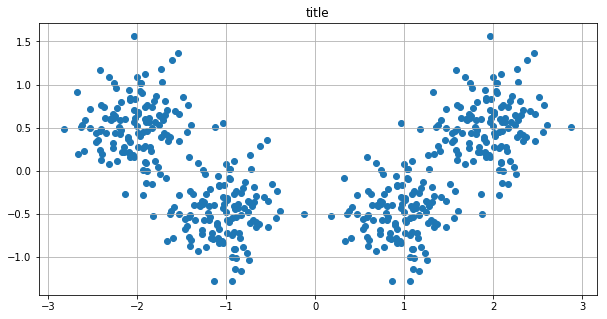

In [2]:
data = np.loadtxt("cluster.dat").T
print(data.shape)
mean = np.mean(data, 0)
print(mean)

plt.figure(figsize=(10, 5))
plt.scatter(data.T[0], data.T[1])
plt.title('title')
plt.grid()
plt.show()

k =  2
data at start


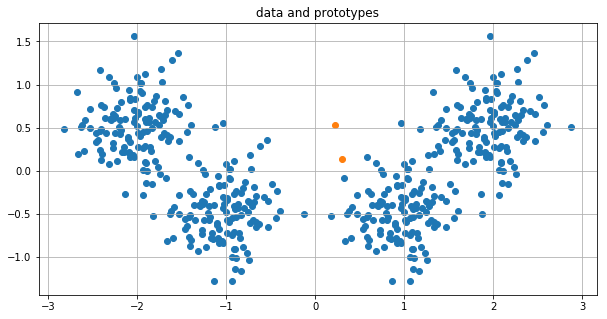

data at end


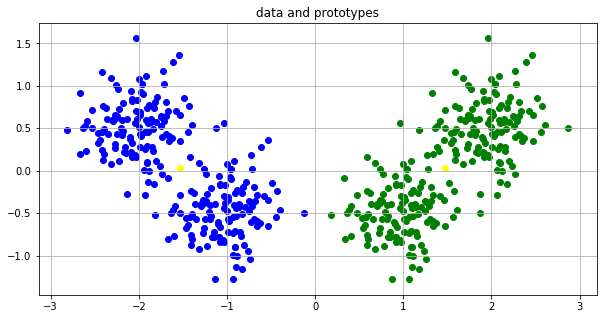

error


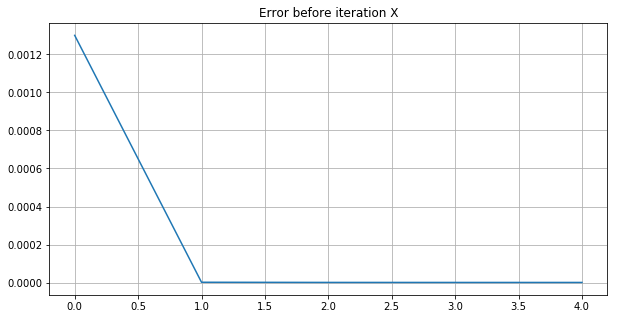

k =  3
data at start


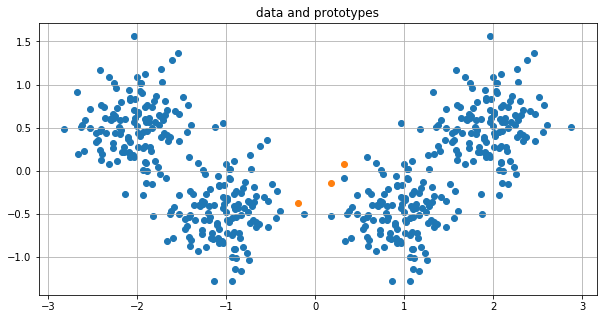

data at end


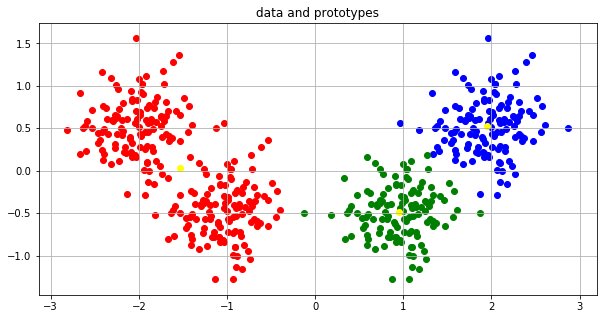

error


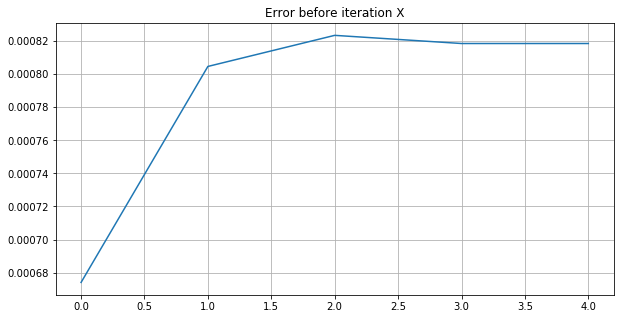

k =  4
data at start


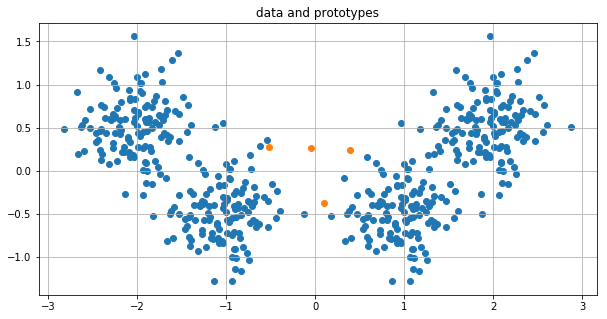

data at end


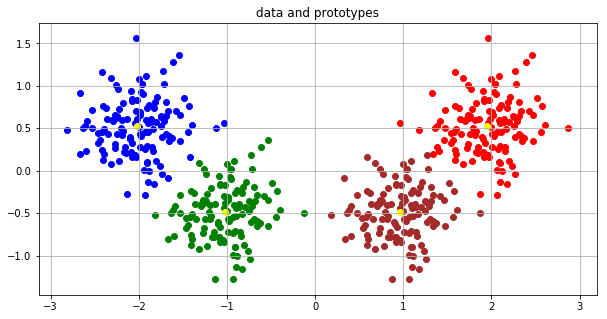

error


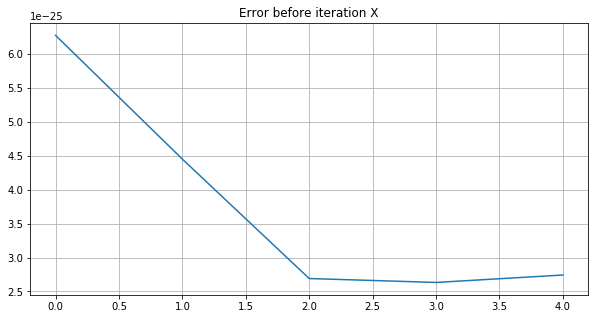

k =  5
data at start


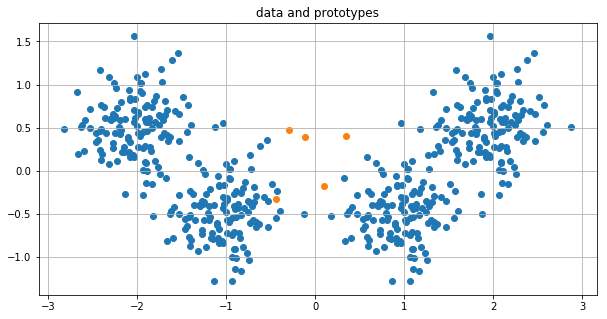

data at end


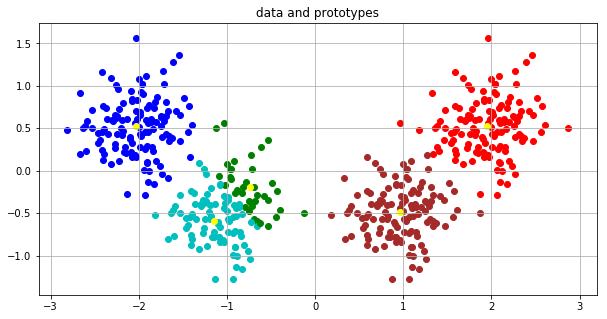

error


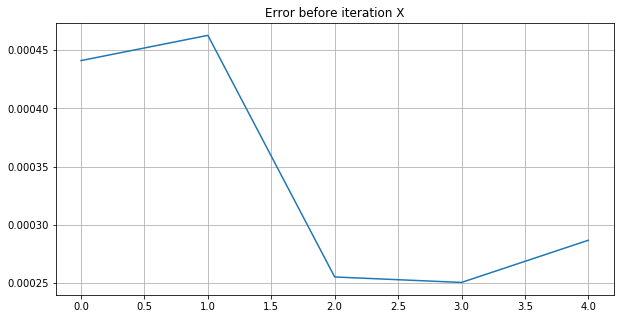

k =  6
data at start


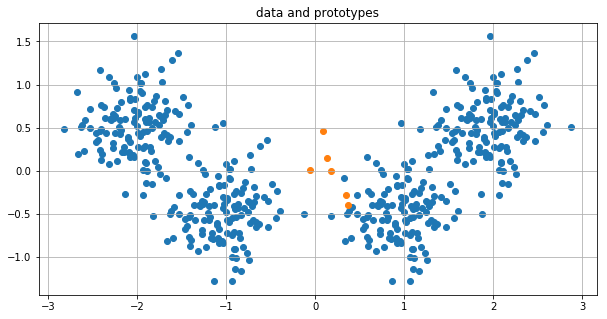

data at end


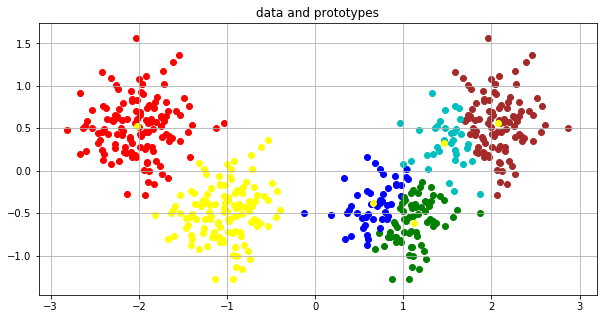

error


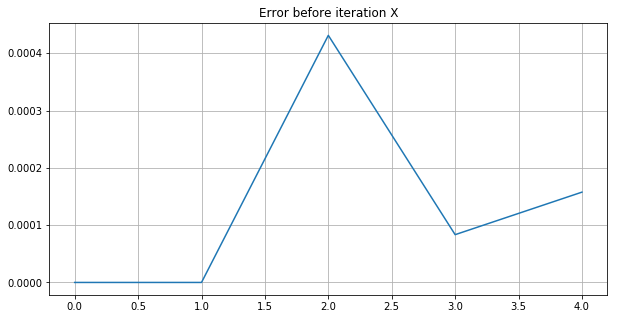

k =  7
data at start


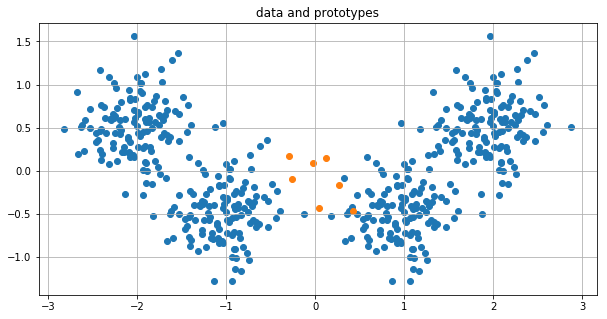

data at end


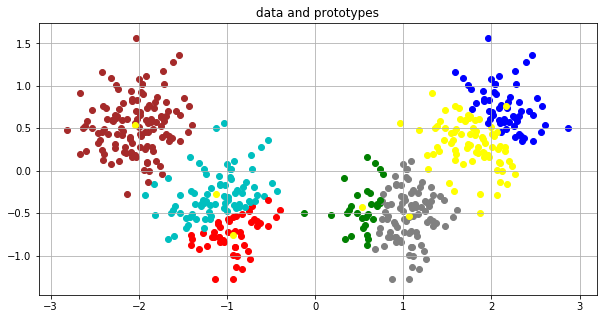

error


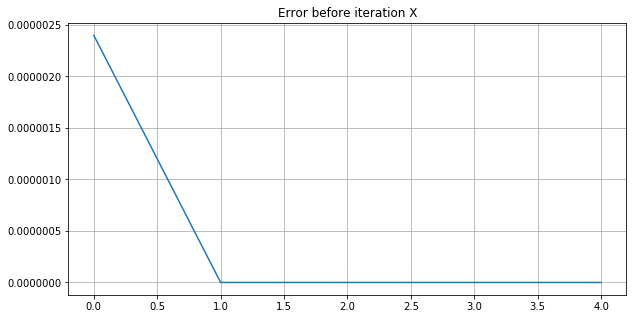

k =  8
data at start


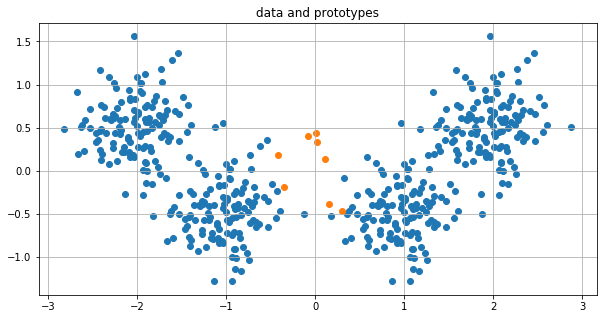

data at end


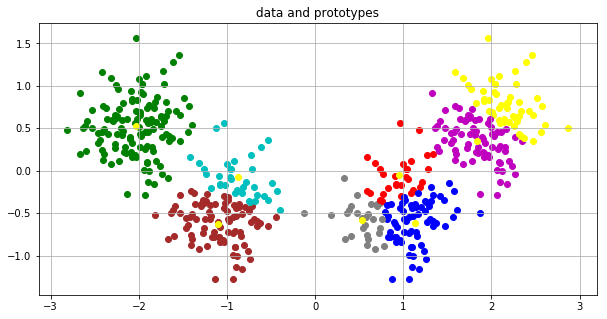

error


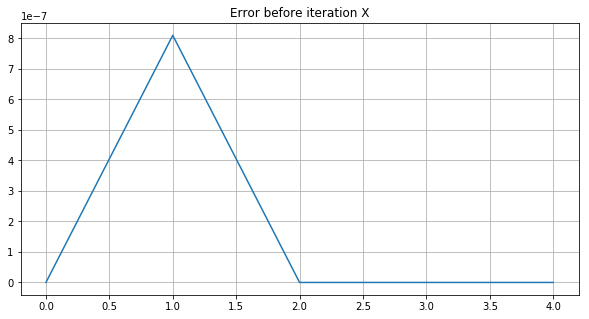

In [3]:
Ks = [2, 3, 4, 5, 6, 7, 8]
tmax = 5
Error = [0.0 for i in range(tmax)]
colors = ['blue', 'green', 'red', 'brown', 'c', 'yellow', 'gray', 'm']

for k in Ks:

    print("k = ", k)
    print("data at start")
    w = [[mean[0] + np.random.random() - 0.5, 
          mean[1] + np.random.random() - 0.5] 
         for i in range(k)]
    w = np.asarray(w)

    plt.figure(figsize=(10, 5))
    plt.scatter(data.T[0], data.T[1])
    plt.scatter(w.T[0], w.T[1])
    plt.title('data and prototypes')
    plt.grid()
    plt.show()

    m = [[0.0 for i in range(k)] for i in range(data.shape[0])]

    # 41.pdf page 8
    for loop in range(tmax):

        m = [[0.0 for i in range(k)] for i in range(data.shape[0])]
        m = np.asarray(m)

        # calculate vector m
        for alpha in range(data.shape[0]):
            dist_diff = data[alpha] - w
            dist_abs = [0.0 for i in range(k)]
            for i in range(k):
                dist_abs[i] = math.hypot(dist_diff[i, 0], dist_diff[i, 1])
            q = np.argmin(dist_abs)
            m[alpha][q] = 1

        # calculate error function
        for q in range(k):
            for alpha in range(data.shape[0]):
                dist = (data[alpha] - w[q])
                Error[loop] += m[alpha][q] * math.hypot(dist[0], dist[1])
                Error[loop] /= 2 * data.shape[0]

                # update vector w
        for q in range(k):
            number_of_elements = np.sum(m.T[q])
            if number_of_elements != 0:
                mass = np.dot(m.T[q].T, data)
                w[q] = mass / number_of_elements

    # IDENT THIS (one tab more) TO SEE EVERY STEP
    print("data at end")
    plt.figure(figsize=(10, 5))
    for alpha in range(data.shape[0]):
        plt.scatter(data[alpha][0], data[alpha][1], c=colors[np.argmax(m[alpha])])
    plt.scatter(w.T[0], w.T[1], c='yellow')
    plt.title('data and prototypes')
    plt.grid()
    plt.show()

    print("error")
    plt.figure(figsize=(10, 5))
    plt.plot(Error)
    plt.title('Error before iteration X')
    plt.grid()
    plt.show()

## Exercise 2

In [4]:
observations = np.loadtxt('cluster.dat')

def online_Kmeans(observations, tau = .99, eps = .1, max_iter=0, K=4):
    """the online K-means algorithm (8) for the scripts
    return centroids positions over iteration in iterations x centroids x coordinates
    and error over iterations"""
    no_samples = np.shape(observations)[1]
    data_mean = np.mean(observations,axis=1)
    if max_iter == 0:
        max_iter = no_samples
    W = np.zeros((max_iter,K,2))
    W[0] = np.random.normal(loc=data_mean,scale=np.std(observations,axis=1), size = (K,2)) #each row is a prototype
    err = np.zeros(max_iter)
    for t in range(0,max_iter-1):
        err[t] = error(W[t],observations)
        x = observations[:,t%no_samples]
        if t>=int(max_iter/4):
            eps = tau*eps
        dist = np.linalg.norm(W[t]-x,axis=1)
        q = np.argmin(dist)
        W[t+1]=np.copy(W[t])
        W[t+1,q] += eps*(x-W[t,q])
    err[-1] = error(W[-1],observations)
    return W, err

def error(W, observations):
    no_samples = np.shape(observations)[1]
    labels = Kmeans_classifier(W, observations)
    err = 0
    for i in range(len(W)):
        err += np.sum(np.linalg.norm(observations[:,labels==i]-W[i][:,np.newaxis],axis=0))
    err/=(2*no_samples)
    return err
    
def Kmeans_classifier(W, observations):
    """Classify the samples according to their closest centroid
    returns an array of indices corresponding to the classes
    """
    distances = observations-W[:,:,np.newaxis] #shape is prototype x coordinate x sample
    distances = np.linalg.norm(distances,axis = 1) #ith row is euclidean distance to ith protoype for all samples
    labels = np.argmin(distances, axis = 0)
    return labels

def plot_sequence(W,observations,n_iter):
    """plot 6 scatters plots of the data together 
    with the centroids at different times"""
    snapshots = np.linspace(0,n_iter-1,6)
    fig, ax = plt.subplots(2,3,figsize=(16,8))
    ax = ax.ravel()
    xcoords, ycoords = [], []
    for j, i in enumerate(snapshots):
        ax[j].scatter(observations[0],observations[1],c="b",alpha=.5,marker='.')
        ax[j].scatter(W[int(i),:,0],W[int(i),:,1],c= 'r')
        ax[j].set_title('after {} iterations'.format(int(i)))
        xcoords.append(W[int(i),:,0])
        ycoords.append(W[int(i),:,1])
    ax[-1].scatter(W[0,:,0],W[0,:,1],c= 'r',marker='*')
    ax[-1].plot(xcoords,ycoords,c='r')
    plt.show()
    
def plot_err(W,err):
    """plot the coordinates of the prototypes and
    the error against the iterations"""
    fig, ax = plt.subplots(1,2,figsize = (12,4))
    for i in range(len(W[0])):
        ax[0].plot(W[:,i,0])
        ax[0].plot(W[:,i,1])
    ax[0].set_title('Prototype coordinates')
    ax[1].plot(err)
    ax[1].set_title('Error')
    plt.setp(ax,xlabel='Iterations')
    plt.show()
    
def exercise2(observations,n_iter):
    """Train a K-means classifier with new initialization and do all the plotting"""
    W, err = online_Kmeans(observations, max_iter=n_iter);
    plot_err(W,err)
    plot_sequence(W,observations,n_iter)

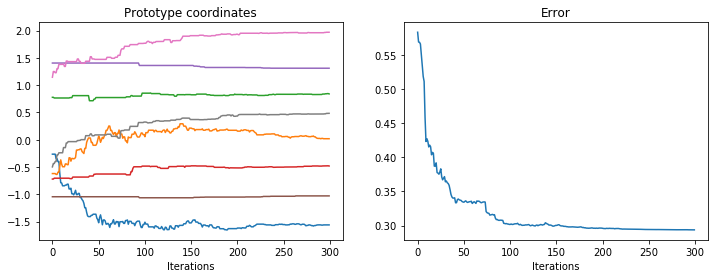

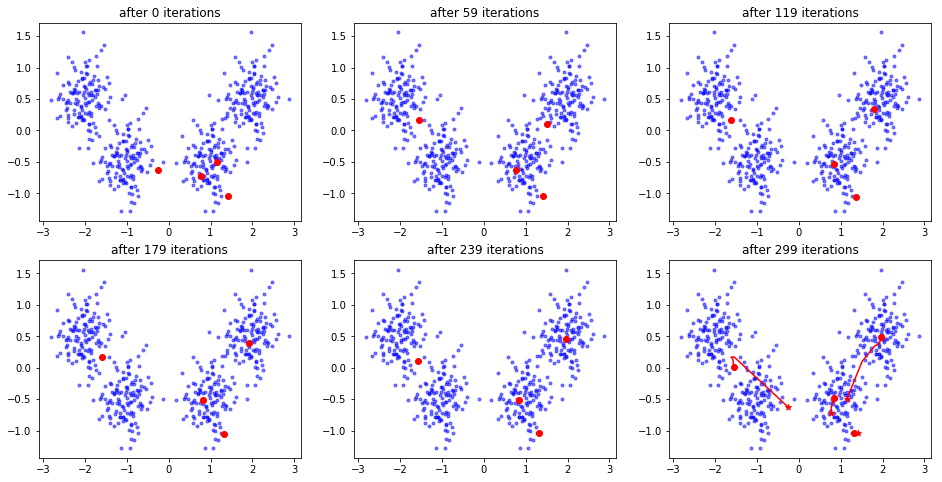

In [5]:
exercise2(observations,300)

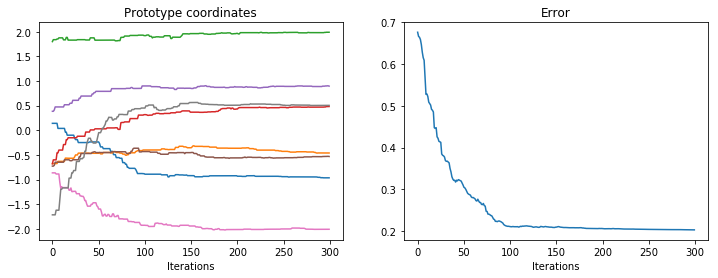

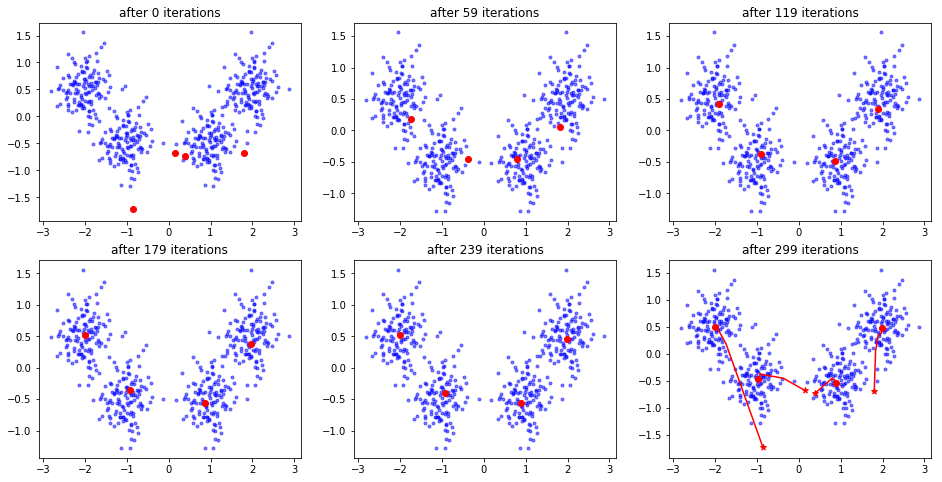

In [6]:
exercise2(observations,300)

## Exercise 3

### a) + b)

In [7]:
k = 8
gamma = 0.001

In [8]:
betas = np.arange(0.2, 20.1, 1)

w_initial = np.array([mean + np.random.rand(2) - 0.5 for i in range(k)])

distances = np.zeros(k)
assignment_probabilities = np.zeros((k, len(data)))
w_final_per_beta = []

for beta in betas:
    print('Simulating for beta =', beta)

    w = w_initial.copy()  # use same initial prototypes for each beta
    distances[:] = np.inf
    
    while any(distances > gamma):
        w_old = w.copy()
        assignment_probabilities[:, :] = 0

        for q in range(k):
            for alpha in range(len(data)):
                #print(q, alpha)
                assignment_probabilities[q, alpha] = np.exp(- beta / 2 * np.linalg.norm(data[alpha] - w[q])**2) / np.sum(np.exp(- beta / 2 * np.linalg.norm(data[alpha] - w[r])**2) for r in range(k))

            w[q] = np.sum(assignment_probabilities[q, alpha] * data[alpha] for alpha in range(len(data))) / np.sum(assignment_probabilities[q, alpha] for alpha in range(len(data)))


        distances = np.linalg.norm(w - w_old, axis=1)
        #print(distances)

    w_final = w.copy()
    w_final_per_beta.append(w.copy())
    
w_final_per_beta = np.array(w_final_per_beta)

Simulating for beta = 0.2
Simulating for beta = 1.2
Simulating for beta = 2.2
Simulating for beta = 3.2
Simulating for beta = 4.2
Simulating for beta = 5.2
Simulating for beta = 6.2
Simulating for beta = 7.2
Simulating for beta = 8.2
Simulating for beta = 9.2
Simulating for beta = 10.2
Simulating for beta = 11.2
Simulating for beta = 12.2
Simulating for beta = 13.2
Simulating for beta = 14.2
Simulating for beta = 15.2
Simulating for beta = 16.2
Simulating for beta = 17.2
Simulating for beta = 18.2
Simulating for beta = 19.2


### c)

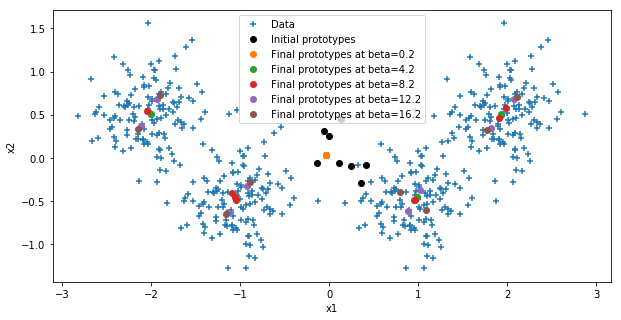

In [9]:
# Plot data
plt.figure(figsize=(10, 5))
plt.scatter(data[:, 0], data[:, 1], label='Data', marker='+')

# Plot initial prototypes.
plt.scatter(w_initial[:, 0], w_initial[:, 1], c='k', label='Initial prototypes')

# Plot final prototypes. Only show a small part of the solutions, otherwise it gets too messy.
for w_final, beta in zip(w_final_per_beta[::4], betas[::4]):
    plt.scatter(w_final[:, 0], w_final[:, 1], label='Final prototypes at beta={}'.format(beta))
    
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()

### d)

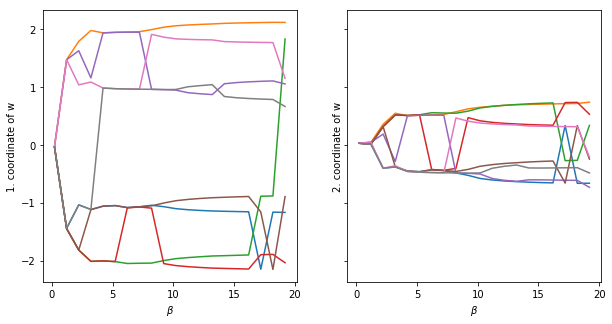

In [10]:
w_final_per_beta = np.array(w_final_per_beta)

fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10, 5))
for i, ax in enumerate(axes.flatten()):
    plt.sca(ax)
    plt.plot(betas, w_final_per_beta[..., i])

    plt.xlabel(r'$\beta$')
    plt.ylabel('{}. coordinate of w'.format(i+1))

As can be seen in the plots, for small $\beta$, the prototypes converge to the origin (both coordinates become 0). For larger $\beta$, the prototypes move to larger values and do a better job at modeling the clusters (see also the scatter plot above)

### e)

In [11]:
ks = [2, 4, 6, 8]

beta_0 = 0.2
beta_f = 20
tau = 1.1

w_initial = np.array([mean + np.random.rand(2) - 0.5 for i in range(k)])

distances = np.zeros(k)
assignment_probabilities = np.zeros((k, len(data)))
w_final_per_k = []

for k in ks:
    
    print('Simulating for k =', k)

    beta = beta_0
    w = w_initial[:k].copy()  # use same initial prototypes for each k

    while beta < beta_f:

        distances[:] = np.inf

        while any(distances > gamma):
            w_old = w.copy()
            assignment_probabilities[:, :] = 0

            for q in range(k):
                for alpha in range(len(data)):
                    #print(q, alpha)
                    assignment_probabilities[q, alpha] = np.exp(- beta / 2 * np.linalg.norm(data[alpha] - w[q])**2) / np.sum(np.exp(- beta / 2 * np.linalg.norm(data[alpha] - w[r])**2) for r in range(k))

                w[q] = np.sum(assignment_probabilities[q, alpha] * data[alpha] for alpha in range(len(data))) / np.sum(assignment_probabilities[q, alpha] for alpha in range(len(data)))


            distances = np.linalg.norm(w - w_old, axis=1)
            #print(distances)

        beta *= tau

    w_final = w.copy()
    w_final_per_k.append(w_final)

Simulating for k = 2
Simulating for k = 4
Simulating for k = 6
Simulating for k = 8


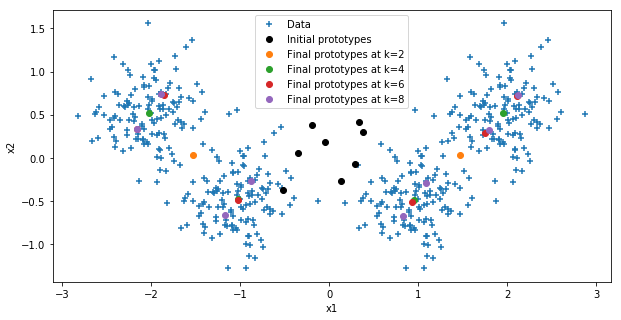

In [12]:
# Plot data
plt.figure(figsize=(10, 5))
plt.scatter(data[:, 0], data[:, 1], label='Data', marker='+')

# Plot initial prototypes.
plt.scatter(w_initial[:, 0], w_initial[:, 1], c='k', label='Initial prototypes')

# Plot final prototypes. 
for w_final, k in zip(w_final_per_k, ks):
    plt.scatter(w_final[:, 0], w_final[:, 1], label='Final prototypes at k={}'.format(k))
    
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()

Note that all initial prototypes (i.e. k=8) are shown here. For simulations with smaller values of k, only the first few prototypes are used in the simulation.